In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import io  #has functions to read and write images
from skimage import color as change # contains function to change between color spaces

import cv2  # OpenCV - https://opencv.org/

np.set_printoptions(precision=2)

from IPython.display import Image

photometric_path = "photometric_hidden_image.png"
geometric_path = "geometric_puzzle_scrambled.png"


<Figure size 640x480 with 0 Axes>

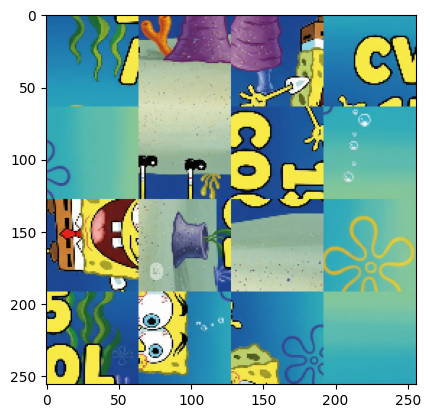

<Figure size 640x480 with 0 Axes>

In [18]:

img = cv2.imread(geometric_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB

plt.imshow(img)
plt.figure()

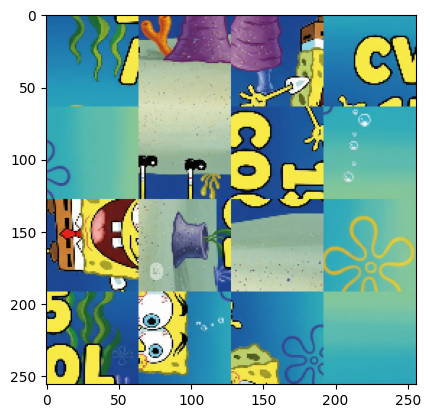

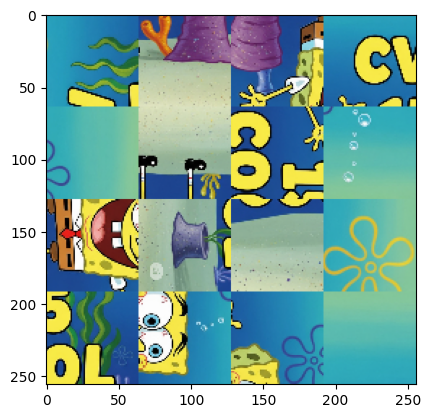

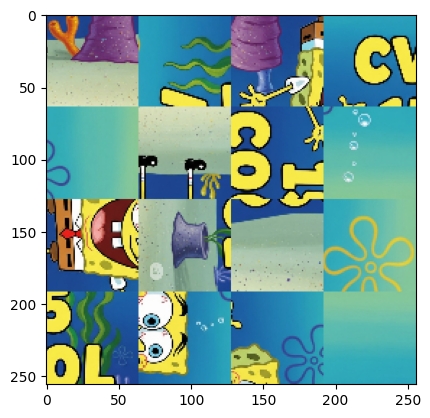

In [31]:
def tile_slice(r, c, size=64):
    y0, x0 = r*size, c*size          # rows -> y, cols -> x
    return slice(y0, y0+size), slice(x0, x0+size)

def rotate_tile(img, tile, clockwise=True, size=64):
    r, c = tile
    ys, xs = tile_slice(r, c, size)
    patch = img[ys, xs]
    rot_flag = cv2.ROTATE_90_CLOCKWISE if clockwise else cv2.ROTATE_90_COUNTERCLOCKWISE
    img[ys, xs] = cv2.rotate(patch, rot_flag)
    return img

def swap_tiles(img, tile1, tile2, size=64):
    r1, c1 = tile1
    r2, c2 = tile2
    ys1, xs1 = tile_slice(r1, c1, size)
    ys2, xs2 = tile_slice(r2, c2, size)

    tmp = img[ys1, xs1].copy() 
    img[ys1, xs1] = img[ys2, xs2]
    img[ys2, xs2] = tmp
    return img

img = cv2.imread(geometric_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB

plt.imshow(img)
plt.figure()

img = rotate_tile(img, (0, 0))

plt.imshow(img)
plt.show()

img = swap_tiles(img, (0, 0), (0, 1))

plt.imshow(img)
plt.show()
